# Housing Price Regression Walkthrough:

1. Basic data cleaning and feature exploration
2. Exploratory data analysis (Answering questions we have of the data)
3. Basic Data Engineering (Creating a pipeline for tain and test sets)
4. Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost, MLP)
5. Feature Engineering
6. Ensembling
7. Submitting to the Competition


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

# Basic Data Exploration
1. Import the data
2. Look at summary statisitcs
3. Evaluate Null Values

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
# Function to create scrollable table within a small window
def create_scrollable_table(train, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += train.to_html()
    html += '</div>'
    return html

In [4]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Summary statistics for numerical features
numerical_features = train.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Summary statistics for categorical features
categorical_features = train.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [7]:
# Null values in the dataset
null_values = train.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (train.isnull().sum() / len(train)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/tmp/ipykernel_32/26484964.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

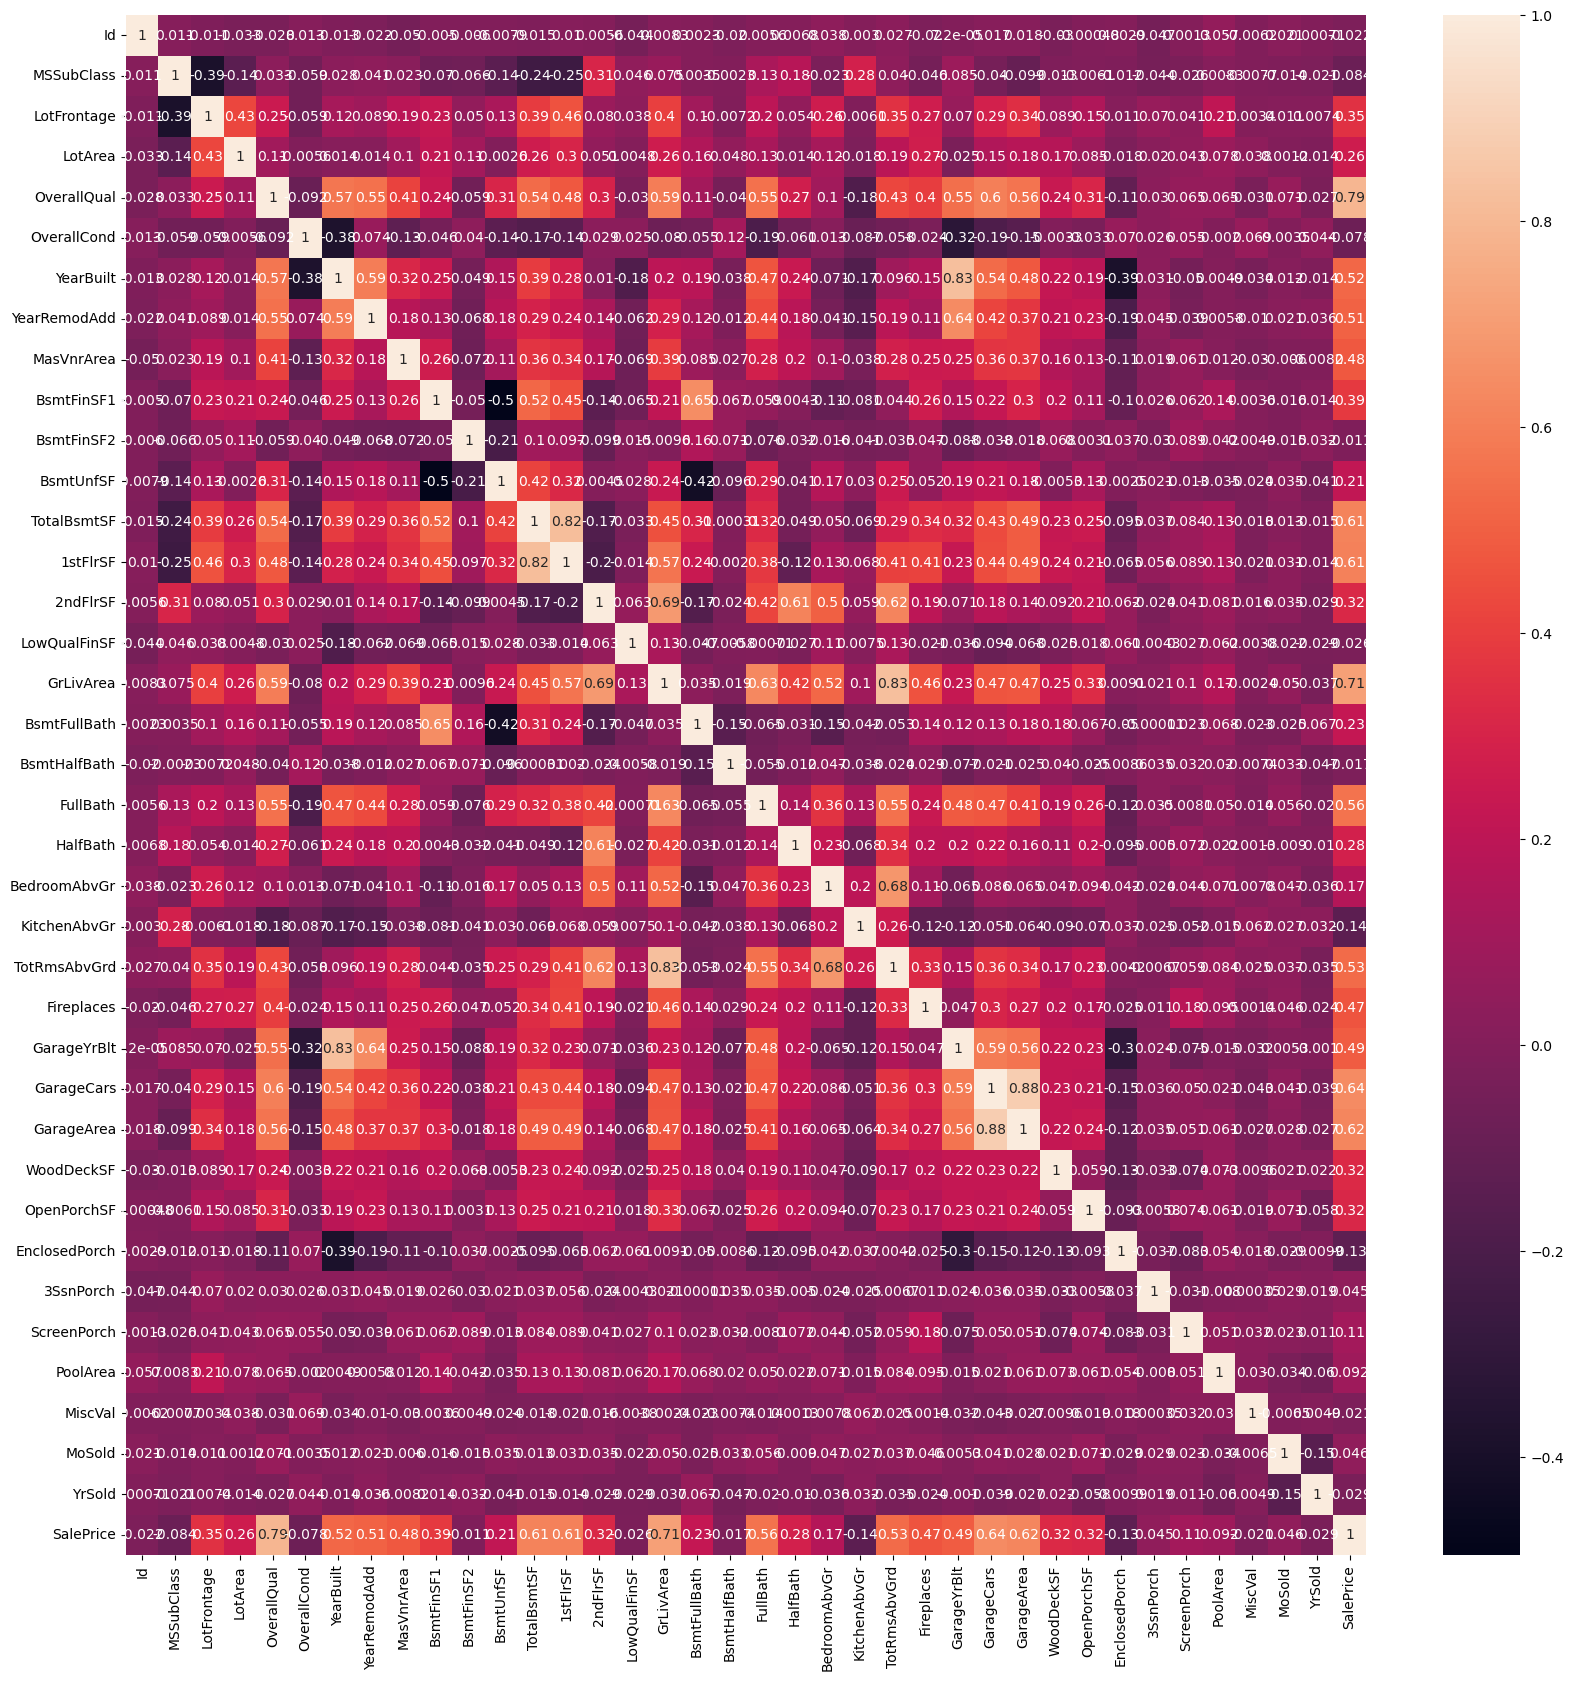

In [9]:
import seaborn as sns

corr = train.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corr, annot = True)

<Axes: >

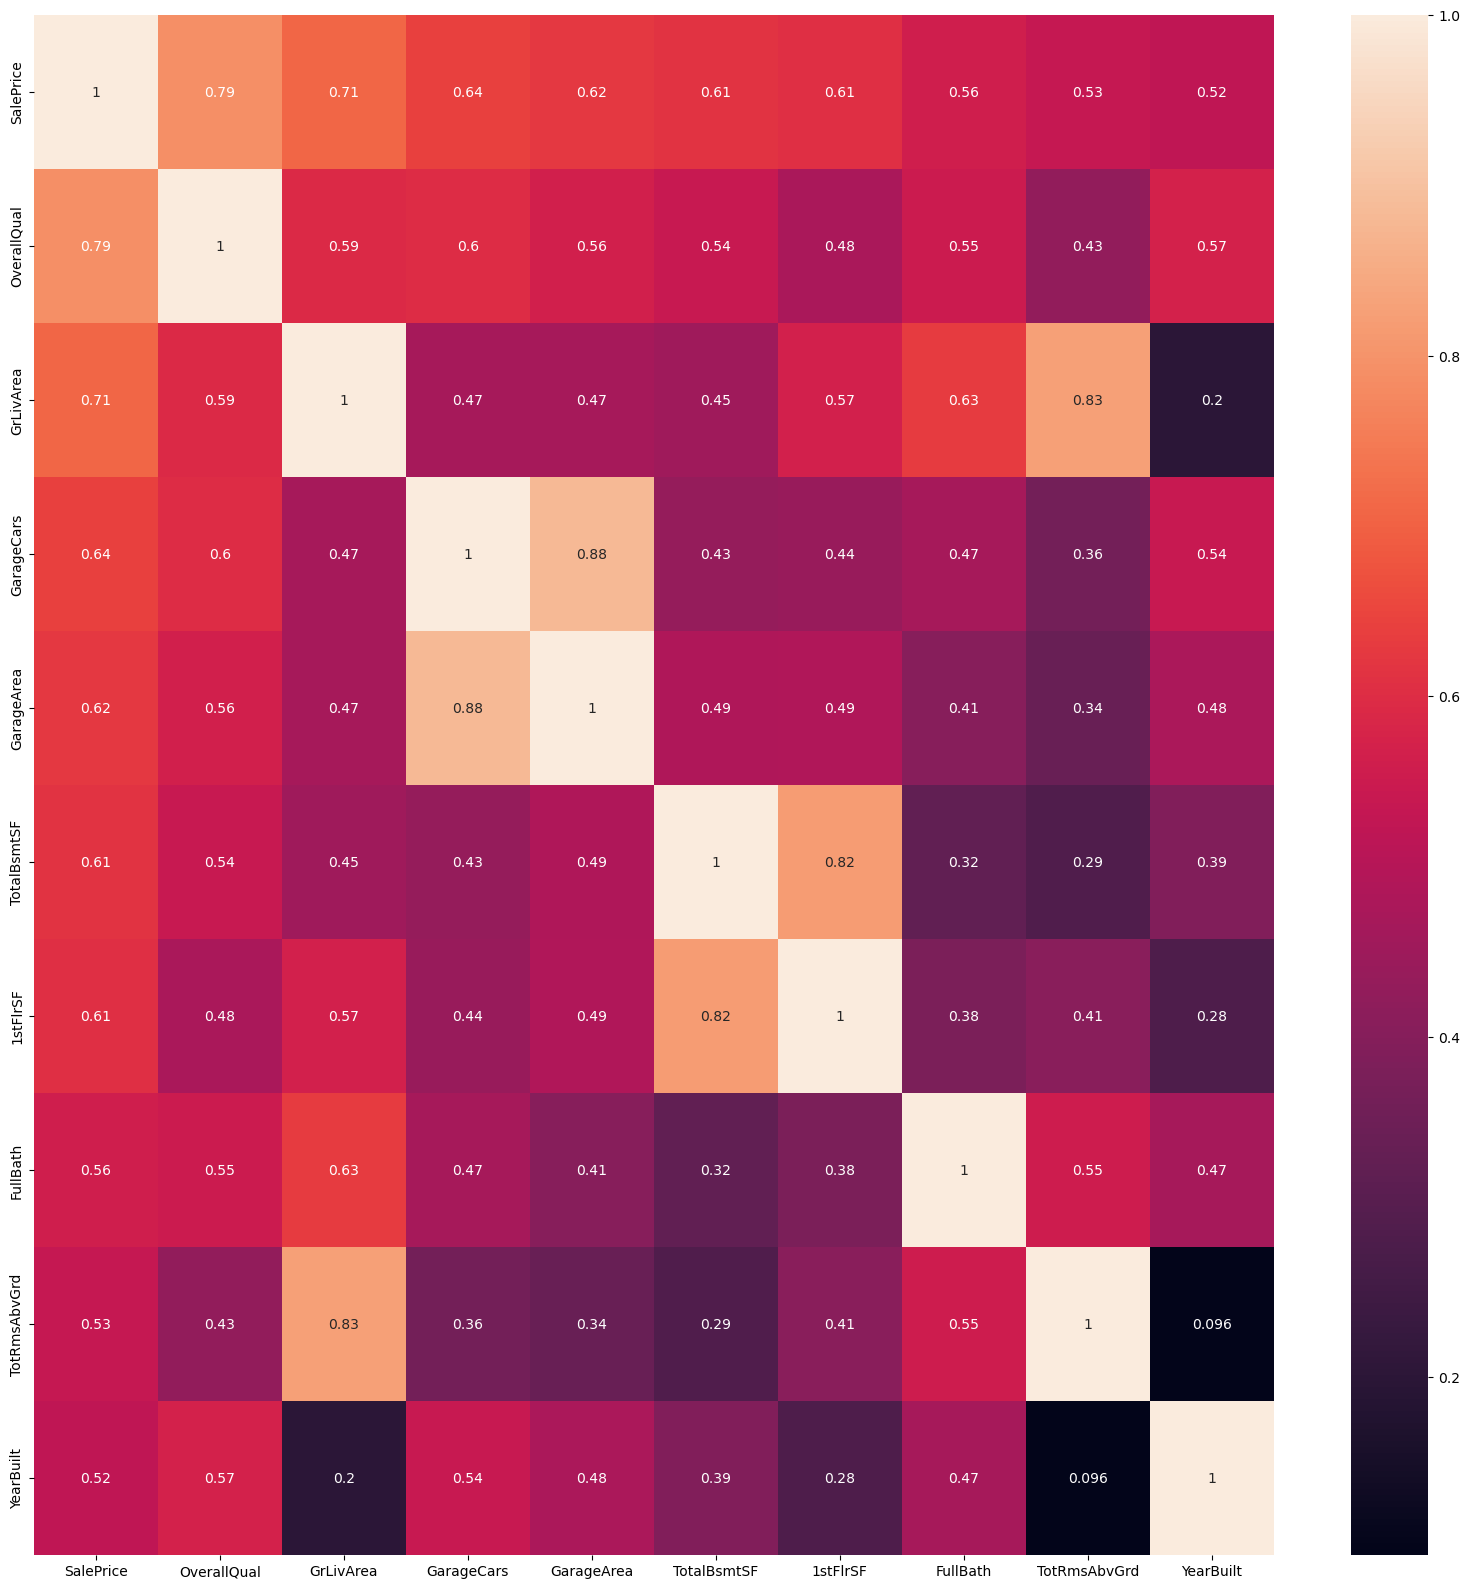

In [10]:
corr_cols = corr['SalePrice'].sort_values(ascending = False).head(10).index
corr_SalePrice = train[corr_cols].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corr_SalePrice, annot = True)

# Explore the dependent variable
1. Should it be normalized?
2. Normalize Dependent Vairable

In [11]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(train['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=train['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(train['SalePrice'].min(), train['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create a Q-Q plot
qq_data = stats.probplot(train['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

#notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

# What questions do we want to ask of the data?
1. How is the distribution of sale prices in the dataset? What is the range of prices?
2. What are the most common types of building classes (MSSubClass) in the dataset?
3. How does the overall quality (OverallQual) of the houses correlate with their sale prices?
4. Are there any notable differences in sale prices based on the neighborhood (Neighborhood) where the houses are located?
5. Is there a relationship between the number of rooms (TotRmsAbvGrd) and the sale prices of houses?
6. How does the size of the garage (GarageArea) affect the sale prices of houses?

In [12]:
# 1.How is the distribution of sale prices in the dataset? What is the range of prices?


# Extract the sale prices
sale_prices = train['SalePrice']

# Create a histogram of the sale prices
hist_data = go.Histogram(x=sale_prices, nbinsx=30, name="Histogram", opacity=0.75, marker=dict(color='purple'))

# Calculate the range of prices
price_range = sale_prices.max() - sale_prices.min()
print('Range of prices:', price_range)

# Create the layout for the plot
layout = go.Layout(
    title="Distribution of Sale Prices",
    xaxis=dict(title="Sale Price"),
    yaxis=dict(title="Frequency"),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the histogram
fig = go.Figure(data=[hist_data], layout=layout)

# Show the plot
fig.show()


Range of prices: 720100


In [13]:
# 2.What are the most common types of building classes (MSSubClass) in the dataset?

# Count the occurrences of each building class
building_class_counts = train['MSSubClass'].value_counts()

# Create a bar chart
bar_chart = go.Bar(
    x=building_class_counts.index,
    y=building_class_counts.values,
    marker=dict(color='red')
)

# Create the layout for the plot
layout = go.Layout(
    title='Most Common Building Classes',
    xaxis=dict(title='Building Class'),
    yaxis=dict(title='Count'),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the bar chart
fig = go.Figure(data=[bar_chart], layout=layout)

# Show the plot
fig.show()


In [14]:
# 3.How does the overall quality (OverallQual) of the houses correlate with their sale prices?

# Create a scatter plot of OverallQual vs. SalePrice
scatter_plot = go.Scatter(
    x=train['OverallQual'],
    y=train['SalePrice'],
    mode='markers',
    marker=dict(color='yellow'),
    name='Data Points'
)

# Create the layout for the plot
layout = go.Layout(
    title='Correlation between Overall Quality and Sale Prices',
    xaxis=dict(title='Overall Quality'),
    yaxis=dict(title='Sale Price'),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[scatter_plot], layout=layout)

# Show the plot
fig.show()


In [15]:
# 4.Are there any notable differences in sale prices based on the neighborhood (Neighborhood) where the houses are located?

# Create a box plot of SalePrice grouped by Neighborhood
box_plot = go.Box(
    x=train['Neighborhood'],
    y=train['SalePrice'],
    name='Sale Price',
    marker=dict(color='purple')
)

# Create the layout for the plot
layout = go.Layout(
    title='Sale Prices by Neighborhood',
    xaxis=dict(title='Neighborhood'),
    yaxis=dict(title='Sale Price'),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the box plot
fig = go.Figure(data=[box_plot], layout=layout)

# Show the plot
fig.show()


In [16]:
# 5.Is there a relationship between the number of rooms (TotRmsAbvGrd) and the sale prices of houses?

# Create a scatter plot of TotRmsAbvGrd vs. SalePrice
scatter_plot = go.Scatter(
    x=train['TotRmsAbvGrd'],
    y=train['SalePrice'],
    mode='markers',
    marker=dict(color='yellow'),
    name='Data Points'
)

# Create the layout for the plot
layout = go.Layout(
    title='Relationship between Number of Rooms and Sale Prices',
    xaxis=dict(title='Number of Rooms'),
    yaxis=dict(title='Sale Price'),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[scatter_plot], layout=layout)

# Show the plot
fig.show()


In [17]:
# 6.How does the size of the garage (GarageArea) affect the sale prices of houses?

# Create a scatter plot of GarageArea vs. SalePrice
scatter_plot = go.Scatter(
    x=train['GarageArea'],
    y=train['SalePrice'],
    mode='markers',
    marker=dict(color='green'),
    name='Data Points'
)

# Create the layout for the plot
layout = go.Layout(
    title='Effect of Garage Size on Sale Prices',
    xaxis=dict(title='Garage Area'),
    yaxis=dict(title='Sale Price'),
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[scatter_plot], layout=layout)

# Show the plot
fig.show()


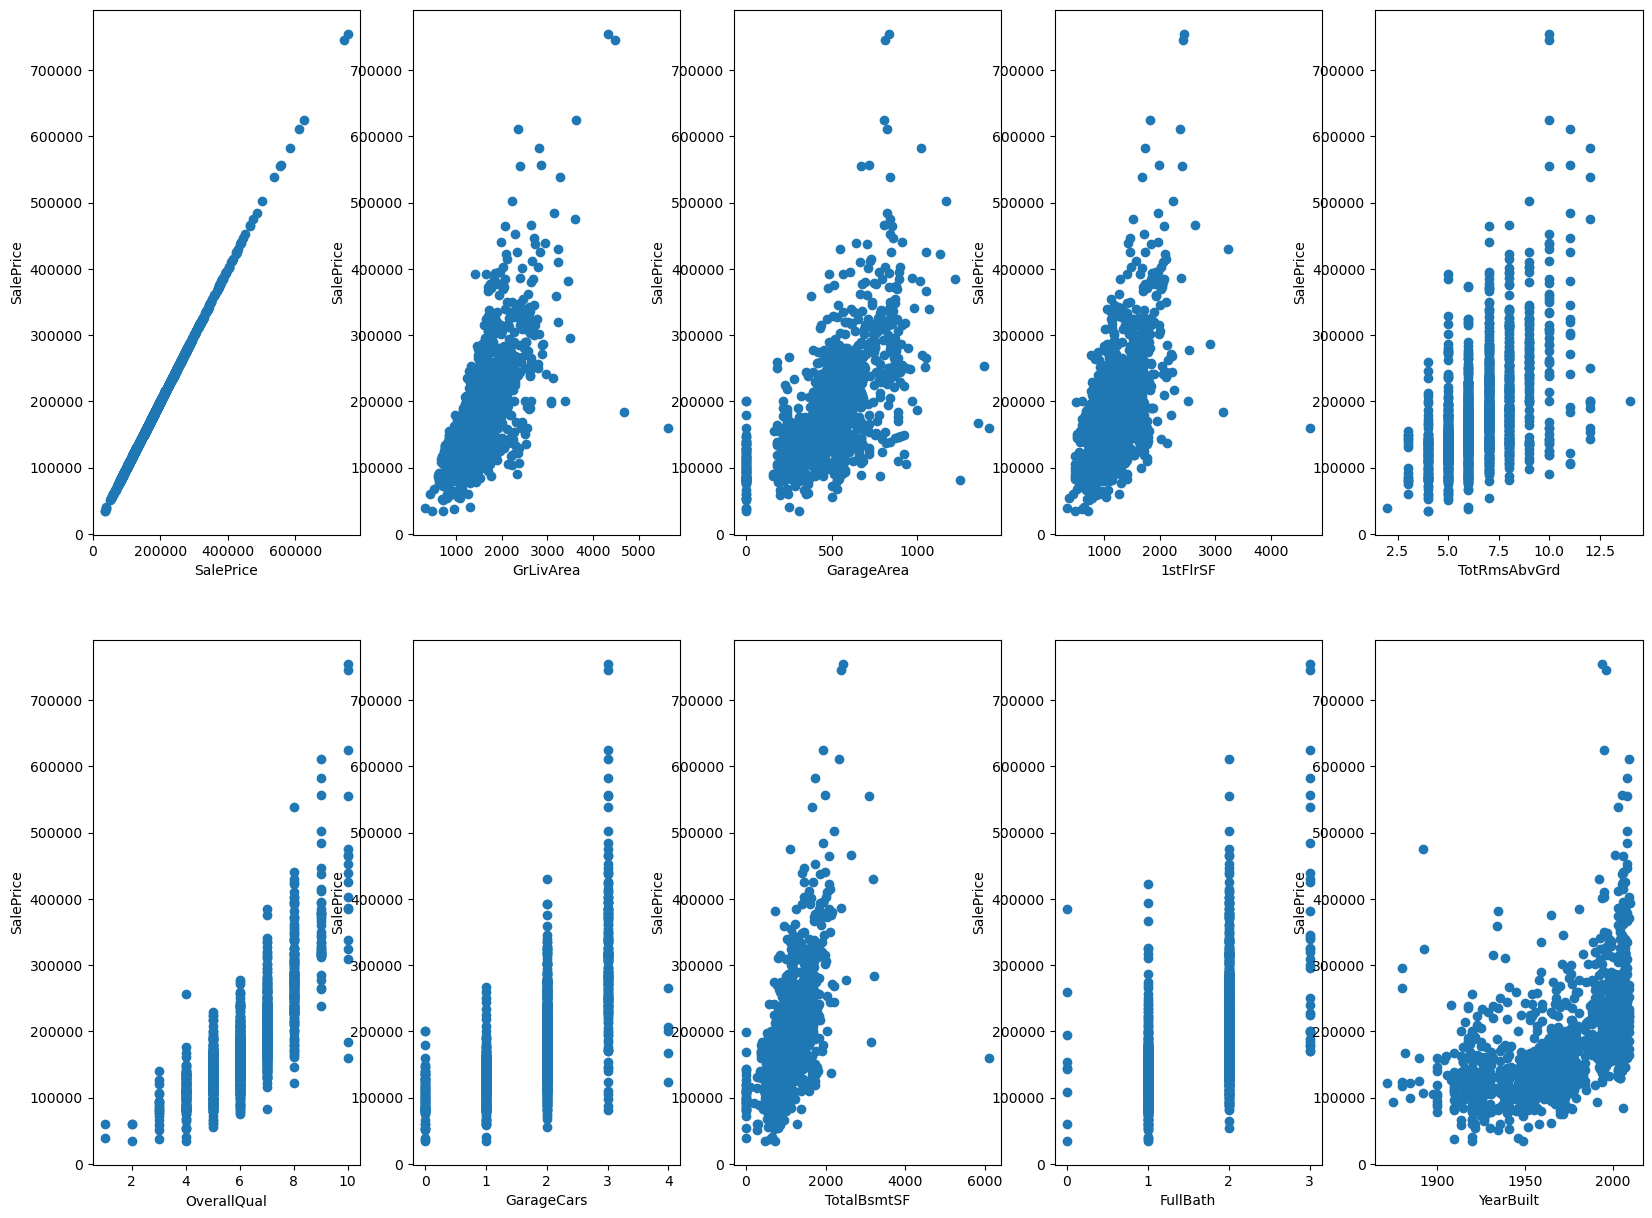

In [18]:
fig, axs = plt.subplots(2, 5, figsize = (20, 15))
x, y = 0, 0
for col in corr_cols:
  axs[x, y].scatter(x = train[col], y = train['SalePrice'])
  axs[x, y].set_xlabel(col)
  axs[x, y].set_ylabel('SalePrice')
  x += 1
  if x == 2:
    x = 0
    y += 1

This is really awesome and let’s analyze it, I hope readers feel the adrenaline when they see a graph like this.

It can be seen that the OverallQual, GarageCars, FullBath, and TotRmsAbvGrd data are non-numeric data
GrLivArea, TotalBsmtSF, and 1stFirSF data show a linear pattern to SalePrice. Next, we will examine the GrLivArea and TotalBsmtSF

code credit: 
Sultan Ardiansyah

# Data preprocessing:
includes data preprocessing steps to handle missing values, handle categorical variables, and perform feature scaling if necessary. This ensures that the data is in a suitable format for training the regression models.

In [19]:
total = train.isnull().sum().sort_values(ascending = False)
pcg = (total / train.isnull().count()).sort_values(ascending = False)
miss_val = pd.concat([total, pcg], axis = 1, keys = ['Total', 'Percentage'])
miss_val.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [20]:
drop_col = miss_val[miss_val['Total'] > 1].index
train.drop(drop_col, axis = 1, inplace = True)
train.dropna(subset = ['Electrical'], how = 'any', axis = 0, inplace = True)

**Outliers**
Outliers can also affect the data training process later. Univariate analysis and Multivariate analysis
1. Univariate analysis: Univariate analysis is a one-column data analysis only.
2. Multivariate analysis: Multivariate or bivariate analysis is an analysis of two or more columns.

In [21]:
# Univariate analysis
(Q1, Q3) = np.log(train['SalePrice']).quantile([.25, .75])
IQR = Q3 - Q1
outlier = train[(np.log(train['SalePrice']) < Q1 - (1.5 * IQR)) | (np.log(train['SalePrice']) > Q1 + (1.5 * IQR))]
train = train.drop(outlier.index).reset_index(drop = True)

In [22]:
# Multivariate analysis
from scipy.stats import chi2
def mahalanobis(data):
  x_mu = data - np.mean(data)
  inv_cov = np.linalg.inv(np.cov(data.values.T))
  mah = np.dot(np.dot(x_mu, inv_cov), x_mu.T)
  return mah.diagonal()

In [23]:

train['mahalanobis'] = mahalanobis(train[['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF']])
train['chi-square'] = chi2.rvs(train['mahalanobis'])
train[['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'mahalanobis', 'chi-square']].head()


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,mahalanobis,chi-square
0,7,2,2,8,1710,856,3.069959,5.479724
1,6,2,2,6,1262,1262,2.986547,1.285509
2,7,2,2,6,1786,920,3.997306,1.290492
3,7,3,1,7,1717,756,11.455154,11.758217
4,8,3,2,9,2198,1145,7.532793,3.160456


In [24]:
df_final = pd.get_dummies(train)
df_final.sort_index(axis = 1, inplace = True)
df_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinSF1,...,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,chi-square,mahalanobis
0,856,854,0,3,1,0,0,0,0,706,...,8,856,1,0,0,2003,2003,2008,5.479724,3.069959
1,1262,0,0,3,1,0,0,0,0,978,...,6,1262,1,0,298,1976,1976,2007,1.285509,2.986547
2,920,866,0,3,1,0,0,0,0,486,...,6,920,1,0,0,2001,2002,2008,1.290492,3.997306
3,961,756,0,3,1,0,0,0,0,216,...,7,756,1,0,0,1915,1970,2006,11.758217,11.455154
4,1145,1053,0,4,1,0,0,0,0,655,...,9,1145,1,0,192,2000,2000,2008,3.160456,7.532793


# Train and Evaluate Models:
Now we enter the data training stage after the data is ready.

We will divide the data for training and testing purposes with a ratio of 80:20. On the other hand we will separate feature data and target data.

In [25]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['Id', 'mahalanobis', 'chi-square', 'SalePrice'], axis = 1)
Y = df_final['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Advanced regression techniques:
We will use regression algorithms such as Linear Regression, Logistic Regression, RidgeCV and LassoCV as machine learning algorithms as well as several evaluation matrices such as Root Mean Square Error, Mean Absolute Error, and R-Square.
* Linear Regression
* Logistic Regression 
* RidgeCV  
* LassoCV

In [26]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print('Linear Regression')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_lr))
print('R2 :', r2_score(Y_test, Y_pred_lr) * 100)

Linear Regression
RMSE : 55450598663.23864
MAE : 3463022352.051716
R2 : -142497806195140.47


In [27]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
log = LogisticRegression()
log.fit(X_train, Y_train)
Y_pred_log = log.predict(X_test)
print('Logistic Regression')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_log)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_log))
print('R2 :', r2_score(Y_test, Y_pred_log) * 100)

Logistic Regression
RMSE : 35990.44793157172
MAE : 27083.972762645913
R2 : 39.96974289967753


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [28]:
# RidgeCV

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rid = RidgeCV()
rid.fit(X_train, Y_train)
Y_pred_rid = rid.predict(X_test)
print('Ridge')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_rid)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_rid))
print('R2 :', r2_score(Y_test, Y_pred_rid) * 100)


Ridge
RMSE : 17445.2070195195
MAE : 12648.449276215042
R2 : 85.89581633514825


In [29]:
#LassoCV

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
las = LassoCV()
las.fit(X_train, Y_train)
Y_pred_las = las.predict(X_test)
print('Lasso')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_las)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_las))
print('R2 :', r2_score(Y_test, Y_pred_las) * 100)

Lasso
RMSE : 24579.126587629267
MAE : 17987.863256211192
R2 : 72.0018979432834


In [30]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print('Random Forest')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_rf))
print('R2 :', r2_score(Y_test, Y_pred_rf) * 100)


Random Forest
RMSE : 19023.8829852966
MAE : 13935.324747081711
R2 : 83.22764555622545


In [31]:
#XGBoost Regresser

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print('XGBoost')
print('RMSE :', np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print('MAE :', mean_absolute_error(Y_test, Y_pred_xgb))
print('R2 :', r2_score(Y_test, Y_pred_xgb) * 100)


XGBoost
RMSE : 16914.485070092698
MAE : 12351.1749452821
R2 : 86.74092394503552


# Model evaluation:
evaluates the performance of the regression models using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), Linear Regression, Logistic Regression, RidgeCV, LassoCV, Random Forest, XGBoost Regresser etc. This enables the comparison of different models and the selection of the best-performing one.

In [32]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.drop(drop_col, axis = 1, inplace = True)
df_test.dropna(axis = 0, inplace = True)
Id = df_test['Id']
df_test.drop('Id', axis = 1, inplace = True)
df_test_dummy = pd.get_dummies(df_test)
missing_col = set(X_train.columns) - set(df_test_dummy)
for c in missing_col:
  df_test_dummy[c] = 0
extra_col = set(df_test_dummy) - set(X_train.columns)
df_test_dummy.drop(extra_col, axis = 1, inplace = True)
df_test_dummy.sort_index(axis = 1, inplace = True)

# Prediction:
Once the model is trained and evaluated, it can be used to make predictions on new, unseen data. This allows users to estimate house prices based on the provided features.


In [33]:
df_test_predict = xgb.predict(df_test_dummy)
submission_df = pd.DataFrame({
    'Id': Id,
    'SalePrice': df_test_predict
})


In [34]:
submission_df.to_csv('submission.csv', index=False)
